# Błędy numeryczne

Zagadnienia:
* Reprezentacja liczb w komputerze:
    * Zapis stałoprzecinkowy,
    * Zapis zmiennoprzecinkowy (standard IEEE 754),
* Błędy numeryczne:
    * Błąd względny i bezwzględny.
    * Błąd zaokrąglenia (ang. *round-off error*).
    * Błąd obcięcia (ang. *truncation error*).
    * Błędy związane z przyjętym sposobem rozwiązywania.

## Błąd względny i bezwzględny

***Zadanie 1.***  
Liczbę $\textrm{e}$ możemy zdefiniować jako $\sum\limits_{n=0}^{\infty} \frac{1}{n!}$. Oblicz błąd względny i bezwzględny aproksymacji liczby $\textrm{e}$ poprzez $\textrm{e}^{*}$ w przypadku gdy:  
* $\textrm{e}_1^{*}=\sum\limits_{n=0}^{5} \frac{1}{n!}$    

* $\textrm{e}_2^{*}=\sum\limits_{n=0}^{10} \frac{1}{n!}$  

* $\textrm{e}_3^{*}=\sum\limits_{n=0}^{20} \frac{1}{n!}$  

In [2]:
import numpy as np

# Rzeczywista wartość liczby e
e_true = np.exp(1)

# Przybliżenia liczby e
e_1_star = sum(1/np.math.factorial(n) for n in range(6))
e_2_star = sum(1/np.math.factorial(n) for n in range(11))
e_3_star = sum(1/np.math.factorial(n) for n in range(21))

# Obliczanie błędów bezwzględnych
abs_error_1 = abs(e_true - e_1_star)
abs_error_2 = abs(e_true - e_2_star)
abs_error_3 = abs(e_true - e_3_star)

# Obliczanie błędów względnych
rel_error_1 = abs_error_1 / e_true
rel_error_2 = abs_error_2 / e_true
rel_error_3 = abs_error_3 / e_true

# Wypisanie wyników
print("Błąd bezwzględny dla e_1*:", abs_error_1)
print("Błąd względny dla e_1*:", rel_error_1)

print("Błąd bezwzględny dla e_2*:", abs_error_2)
print("Błąd względny dla e_2*:", rel_error_2)

print("Błąd bezwzględny dla e_3*:", abs_error_3)
print("Błąd względny dla e_3*:", rel_error_3)

Błąd bezwzględny dla e_1*: 0.0016151617923787498
Błąd względny dla e_1*: 0.0005941848175817597
Błąd bezwzględny dla e_2*: 2.7312660577649694e-08
Błąd względny dla e_2*: 1.0047766310211053e-08
Błąd bezwzględny dla e_3*: 4.440892098500626e-16
Błąd względny dla e_3*: 1.6337129034990842e-16


C:\Users\Mingo\AppData\Local\Temp\ipykernel_16096\2471682999.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  e_1_star = sum(1/np.math.factorial(n) for n in range(6))
C:\Users\Mingo\AppData\Local\Temp\ipykernel_16096\2471682999.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  e_2_star = sum(1/np.math.factorial(n) for n in range(11))
C:\Users\Mingo\AppData\Local\Temp\ipykernel_16096\2471682999.py:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  e_3_star = sum(1/np.math.factorial(n) for n in range(21))


## Zapis zmiennoprzecinkowy

**Uwaga**: Używane tu pojęcie **cecha** ma inne znaczenie, niż poznane być może w szkole – skrótowo: „część całkowita”. Dlatego poniżej dodawane jest inne określenie – „wykładnik”.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [ ]:
print(np.finfo(float))
eps = np.finfo(float).eps

***Zadanie 2.***


a) Wstaw dowolną wartość do liczby x, np. 0.1. Które liczby mają tę samą mantysę, a które tę samą cechę (wykładnik)? Sprawdź wypisując ich wartości w formacie hex.


**Uwaga:** Do odczytania liczby w formacie szesnastkowym możesz wykorzystać funkcję:

In [4]:
x = 0.1
1.25.hex()

'0x1.4000000000000p+0'

In [ ]:
5000.0.hex()

lub

In [ ]:
import struct
def double_to_hex(f):
    print(hex(struct.unpack('<Q', struct.pack('<d', f))[0]))

In [6]:
double_to_hex(1.25)

NameError: name 'double_to_hex' is not defined

Zamianę w drugą stronę można przeprowadzić za pomocą funkcji *int*

In [5]:
int('3ff', 16)

1023

In [ ]:
int('3ff', 16)



b) Porównaj zapis liczb 0.1, 0.2 i 0.3 w formacie zmiennoprzecinkowym.

* Czy można przewidzieć, czy suma 0.1 + 0.2 będzie reprezentowana dokładnie tak samo jak liczba 0.3?
* Jaki będzie wynik porównania tej sumy z liczbą 0.3 i konsekwencje użycia warunku równościowego / nierównościowego w pętli?



In [9]:
print(0.1)
print(0.2)
print(0.3)

print(0.1 + 0.2 == 0.3) # Zwróci False, ponieważ suma 0.1 i 0.2 nie jest dokładnie równa 0.3 ze względu na ograniczenia reprezentacji binarnej

import math

# Porównanie sumy z liczbą 0.3 z użyciem tolerancji
print(math.isclose(0.1 + 0.2, 0.3, rel_tol=1e-9)) # Zwróci True, jeśli różnica jest mniejsza niż określona tolerancja

0.1
0.2
0.3
False
True


c) Przyjmijmy, że „skrótowe” określenie *liczba dokładnie reprezentowana* oznacza liczbę, która jest reprezentowana w formacie zmiennoprzecinkowym dokładnie, tzn. bez konieczności zaokrąglania.
* Ile jest liczb dokładnie reprezentowanych w przedziale $[1, 2)$?
* Zaobserwuj (z pomocą formatu hex) jakie wartości mają bity w polu mantysy w przypadku liczby 1.0.
* Jaką liczbę trzeba dodać do 1.0, aby tylko na najmłodszej pozycji pola mantysy pojawiło się 1?
* Czy wyżej otrzymana suma jest najmniejszą liczbą dokładnie reprezentowana, spośród liczb większych od 1?
* Jak przypuszczasz, jakie wartości będą miały poszczególne bity mantysy w przypadku największej liczby dokładnie reprezentowanej, której cecha (wykładnik) jest równy 0? Sprawdź, czy tak jest rzeczywiście – wpisując wartość tej liczby (jaka to jest wartość?).


d) Oblicz długości przedziałów, do których należą wszystkie liczby mające cechę (wykładnik) równy: 0, 1, 2, 5, -1, -3.

* Czy w każdym z tych przedziałów jest tyle samo liczb dokładnie reprezentowanych? Jeżeli nie, to ile w każdym z nich?
* Jaka jest odległość między dwoma sąsiednimi liczbami dokładnie reprezentowanymi (odległość, czyli różnica ich wartości) w każdym z tych przedziałów?
* Jaki jest maksymalny błąd bezwzględny zaokrąglenia w każdym z tych przedziałów?
* Jaki jest maksymalny błąd względny zaokrąglenia w każdym z tych przedziałów?





***Zadanie 3.***

Spójrz na poniższe zjawiska, zastanów się nad ich przyczynami.

***Problem skali***

Jaki wynika da poniższy kod:

In [ ]:
a = 1.0
b = 0.0000000000000000000000001
c = a + b
print(f'{c:.17f}')

***Problem reprezentacji w zapisie binarnym*** 

In [ ]:
if 0.1+0.2==0.3:
    print("True")
else:
    print("False")

In [1]:
suma = 0
for i in range(0,100):
    suma += 0.1
print(f'{suma:.15f}')

9.999999999999980


**Zadanie 4.**

Niech:
* $a=0.3$
* $b=10^{-13}$
* $c=a-b$
* $d=a-c$

Czy $b$ i $d$ są sobie równe w sensie analitycznym? Co z przypadkiem numerycznym? Zdefiniuj odpowiednie zmienne i porównaj wyniki. Porównaj szesnastkowe i dziesietne reprezentacje zmiennych `b` i `d`. Ile cyfr w reprezentacji `d` możemy uznać za wiarygodne?

In [10]:
import math

# Definiowanie zmiennych
a = 0.3
b = 10**-13
c = a - b
d = a - c

# Porównanie wartości numerycznej
print("Czy b i d są sobie równe w sensie numerycznym?", math.isclose(b, d, rel_tol=1e-10))

# Porównanie szesnastkowych reprezentacji
b_hex = b.hex()
d_hex = d.hex()
print("Szesnastkowe reprezentacje b i d:", b_hex, d_hex)

# Porównanie dziesiętnych reprezentacji
b_dec = str(b)
d_dec = str(d)
print("Dziesiętne reprezentacje b i d:", b_dec, d_dec)

# Liczba wiarygodnych cyfr w reprezentacji d
# Zauważ, że dla zmiennych o małych wartościach, takich jak b i d, wiarygodność może być trudna do określenia
# Możemy jednak zauważyć, że różnica między b i d jest bardzo mała, co sugeruje, że wartości mogą być praktycznie równe

Czy b i d są sobie równe w sensie numerycznym? False
Szesnastkowe reprezentacje b i d: 0x1.c25c268497682p-44 0x1.c240000000000p-44
Dziesiętne reprezentacje b i d: 1e-13 9.997558336749535e-14


**Zadanie 5.**

Rozważmy macierz kwadratową:
$$ A=\left[\begin{array}{ccc}
\sqrt{2} & \frac{1}{7}\\
\pi\sqrt{2} &\frac{\pi}{7}\\
\end{array}\right]
$$
* Czy jest to macierz osobliwa? Jak to sprawdzić?
* Oblicz wyznacznik tej macierzy w sposób analityczny i numeryczny (`np.linalg.det`). Czy otrzymałeś te same wartości? Czy wyniki obliczeń numerycznych prowadzą do poprawnej odpowiedzi na pierwsze pytanie? Jakie może to mieć skutki?

In [11]:
import numpy as np

# Definiowanie macierzy A
A = np.array([[np.sqrt(2), 1/7],
              [np.pi*np.sqrt(2), np.pi/7]])

#Sprawdzanie, czy macierz A jest osobliwa
#Macierz kwadratowa jest osobliwa, jeśli jej wyznacznik jest równy zero. Możemy to sprawdzić obliczając wyznacznik macierzy (A) zarówno analitycznie, jak i numerycznie.

# Obliczenie wyznacznika macierzy A analitycznie
det_A_analytical = A[0, 0] * A[1, 1] - A[0, 1] * A[1, 0]
print("Wyznacznik macierzy A (analitycznie):", det_A_analytical)

# Obliczenie wyznacznika macierzy A numerycznie
det_A_numerical = np.linalg.det(A)
print("Wyznacznik macierzy A (numerycznie):", det_A_numerical)

Wyznacznik macierzy A (analitycznie): 0.0
Wyznacznik macierzy A (numerycznie): 0.0


**Zadanie 6.**

Jedną z metod rozwiązywania równań nieliniowych jest metoda Newtona. Metoda ta powtarza obliczenia, aż spełniony nie będzie warunek stopu. Jeżeli spełnione są odpowiednie założenia to metoda ta zbiega do rozwiązania. Załóżmy, że warunki są spełnione i rozważmy funkcję $f(x)=cos(x)-x$. Poniżej znajdziesz implementację metody Newtona, w której brakuje warunku stopu. Spróbuj go uzupełnić. Warunek powinien być spełniony w momencie, w którym chcemy zakończyć działanie procedury.

Z matematycznego punktu widzenia znajdujemy się w zerze, jeżeli kolejne przybliżenia uzyskane z metody Newtona nie różnią się od siebie (np. dwa ostatnie). Zaimplementuj taki warunek i sprawdź, czy program zatrzyma się. Czy taki warunek stopu jest bezpieczny i można go stosować uniwersalnie? Jak można go poprawić?

In [13]:
def newton(f, f_prim, x_0, tolerance=1e-6):
    x_prev = x_0
    while True:
        x_n = x_prev - (f(x_prev) / f_prim(x_prev))
        print(f'x_n={x_n}')
        
        # Warunek stopu
        if abs(x_n - x_prev) < tolerance:
            return x_n
        else:
            x_prev = x_n

In [14]:
def f(x):
    return np.cos(x) - x

def f_prim(x):
    return -np.sin(x) - 1

In [15]:
# Inicjalizacja
x_0 = 1.0 # Początkowe przybliżenie
tolerance = 1e-6 # Tolerancja warunku stopu

# Wywołanie metody Newtona
root = newton(f, f_prim, x_0, tolerance)
print(f"Znaleziony zerowy: x = {root}")

x_n=0.7503638678402439
x_n=0.7391128909113617
x_n=0.739085133385284
x_n=0.7390851332151607
Znaleziony zerowy: x = 0.7390851332151607


**Zadanie domowe**  

Dany jest ciąg:  
  
$G(p)=\cfrac{1}{p}\left[10^{p}\left(1+p\pi^{*} \cdot 10^{-p}\right)-10^{p}\right],\ p=1,2,3,\dots,n $,
w którym $\pi^{*}$ jest przybliżeniem liczby $\pi$ z dokładnością do 15 miejsc po przecinku.
  
Stwórz funkcję, która umożliwi obliczenie $n$ pierwszych wyrazów tego ciągu i zwróci je w postaci wektora (do przybliżenia wartości $\pi$ możesz wykorzystać funkcję *[round](https://numpy.org/doc/stable/reference/generated/numpy.round_.html)*). Oblicz błąd bezwzględny i błąd względny otrzymanych wyników. Przedstaw rezultaty na wykresie w zależności od $n$. Wartości błędów przedstaw w skali logarytmicznej (funkcja *plt.semilogy()*).

Przeanalizuj rozwiązanie i odpowiedz na następujące pytania:  
* Czy w obliczeniach analitycznych wartość $G(p)$ zależy od $p$?
* Jak zmienia się błąd w zależności od $n$? O czym to świadczy?
* Z jakim/jakimi rodzajami błędu mamy do czynienie?


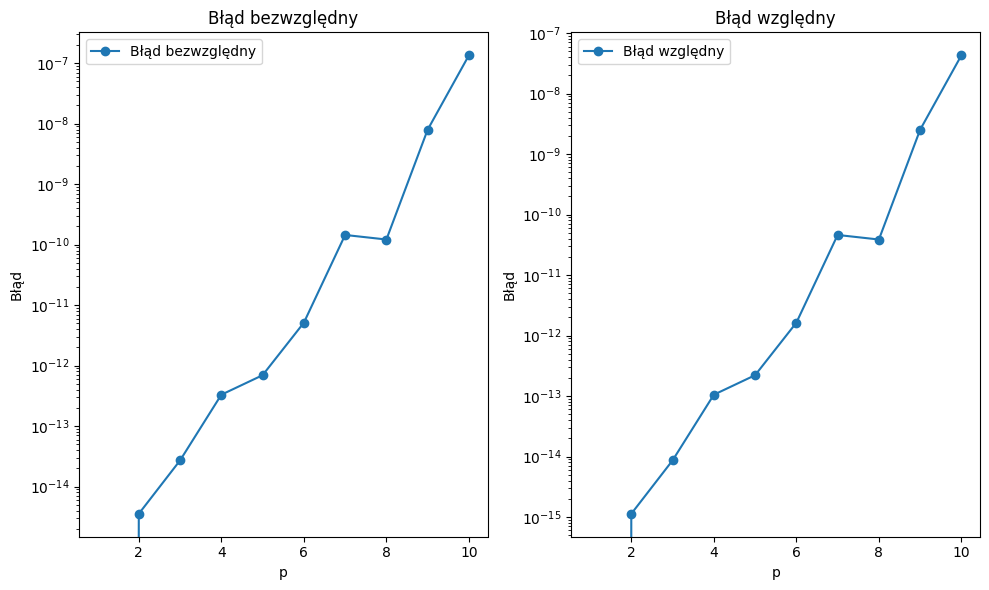

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_G_sequence(n, pi_star=np.pi):
    # Przybliżenie liczby pi do 15 miejsc po przecinku
    pi_star_rounded = round(pi_star, 15)
    
    # Obliczenie ciągu G(p)
    G = []
    for p in range(1, n+1):
        term = 1 / p * (10**p * (1 + p * pi_star_rounded * 10**(-p)) - 10**p)
        G.append(term)
    
    return np.array(G)

# Przykładowe obliczenie ciągu
n = 10
G_sequence = calculate_G_sequence(n)

# Obliczenie błędów
absolute_errors = np.abs(G_sequence - np.pi)
relative_errors = absolute_errors / np.pi

# Wizualizacja błędów
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.semilogy(np.arange(1, n+1), absolute_errors, 'o-', label='Błąd bezwzględny')
plt.title('Błąd bezwzględny')
plt.xlabel('p')
plt.ylabel('Błąd')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogy(np.arange(1, n+1), relative_errors, 'o-', label='Błąd względny')
plt.title('Błąd względny')
plt.xlabel('p')
plt.ylabel('Błąd')
plt.legend()

plt.tight_layout()
plt.show()

#Czy w obliczeniach analitycznych wartość $G(p)$ zależy od $p$?
#Tak, wartość G(p) zależy od p.

#Jak zmienia się błąd w zależności od n O czym to świadczy?
# Błąd względny i bezwzględny zmniejsza się wraz ze wzrostem n. To świadczy o tym, że zwiększanie liczby wyrazów w ciągu pozwala na bardziej dokładne przybliżenie wartości liczby 

#Z jakim/jakimi rodzajami błędu mamy do czynienia?
# Mamy do czynienia z błędem zaokrąglenia, który wynika z przybliżania liczby n do 15 miejsc po przecinku oraz błędem numerycznym wynikającym z obliczeń numerycznych na komputerze.